# Market Segmentation Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('Online Retail.xlsx') #read file
print("=====================")
print(df.head(10))
print("=====================")
print(df.info())
print("=====================")
print(df.describe())
print("=====================")

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26

## Description About Data

### Feature Description :

1. InvoiceNO = Dokumen Id yang digunakan sebagai bukti pembelian, berisi informasi berupa pembayaran yang harus di bayar. apabila Id memilikir awalan 'c', mengindikasikan transaksi batal.
2. Stock Code = Product (item) code. kode unik untuk setiap produk berbeda
3. Description = Product (item) name.
4. Quantity = Jumlah produk setiap transasksi.
5. InvoiceDate = Hari dan waktu dimana setiap transaksi dihasilkan.
6. UnitPrice = Harga setiap produk di sterling.
7. CostumerID = Costumer ID.
8. Country : Nama negara setiap kostumer tinggal.

### Data Set Information
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

### Relevant Paper
If you want to know more about this case, you can visit this research :
Relevant Papers:

The evolution of direct, data and digital marketing, Richard Webber, Journal of Direct, Data and Digital Marketing Practice (2013) 14, 291â€“309. 
Clustering Experiments on Big Transaction Data for Market Segmentation, 
Ashishkumar Singh, Grace Rumantir, Annie South, Blair Bethwaite, Proceedings of the 2014 International Conference on Big Data Science and Computing. 
A decision-making framework for precision marketing, Zhen You, Yain-Whar Si, Defu Zhang, XiangXiang Zeng, Stephen C.H. Leung c, Tao Li, Expert Systems with Applications, 42 (2015) 3357â€“3367

### Conclusion in Explolatory Data Analysis
- Data contains Nominal(object), int, and datetime.
- There are 2 features have missing values. Description and Costumer ID
- We have negative number in quantity and Unit Price, whic is, it's not rational. we need to explore more deep in these data.

## Explolatory Data Analysis

I will call all the data which is have negative quantity.The result is many data that have negative quantity also have cancelation transacion. but not all. 
I'm corious about these data that have negative quantity but have no cancelation. it's not rational. if I can't find this why. I will assume these are fraud data. so I can have the information (information who got the produk but has cancel transaction.

This is very large dataset, need to do many Explolatory Data Analysis, but keep in mind that our goal is to clustering the customer.

What cleaning I do here is :
0. Removing cancel transaction, because in my business perspective, cancel mean the costumer didn't match with the product, so 
1. See for missing values, and consider to remove or fill it.
2. Grouping by Costumer ID since we want to clustering the Customer.
3. Feature engeenering : add count column (how many Costumer buying)
3. See for outlier
4. Visual Explolatory


In [4]:
indexC = []
dex = 0

for a in df['InvoiceNo'] :
    if type(a) != np.int :
        indexC.append(dex)
    dex = dex + 1
    
print(len(indexC))


9291


In [5]:
dfdrop=df.drop(index=indexC)

In [6]:
print(dfdrop.describe())
print("==========================================================================================================")
print(dfdrop.info())
print(dfdrop.shape)

            Quantity      UnitPrice     CustomerID
count  532618.000000  532618.000000  397924.000000
mean       10.240024       3.868412   15294.315171
std       159.593999      32.470442    1713.169877
min     -9600.000000       0.000000   12346.000000
25%         1.000000       1.250000   13969.000000
50%         3.000000       2.080000   15159.000000
75%        10.000000       4.130000   16795.000000
max     80995.000000   13541.330000   18287.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 532618 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      532618 non-null object
StockCode      532618 non-null object
Description    531164 non-null object
Quantity       532618 non-null int64
InvoiceDate    532618 non-null datetime64[ns]
UnitPrice      532618 non-null float64
CustomerID     397924 non-null float64
Country        532618 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.6+ MB
None
(532618, 8)


In [7]:
index0 = dfdrop[dfdrop['UnitPrice']==0].index
dfdrop = dfdrop.drop(index=index0)
dfdrop.describe()

,Quantity,UnitPrice,CustomerID
count,530103.000000,530103.000000,397884.000000
mean,10.542055,3.886765,15294.423453
std,155.524270,32.546281,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


After drop we have no negatif values, that's mean all negatif values are cancel transaction.

In [8]:
count_unique_col = []
for col in dfdrop.columns :
    print("Jumlah Unique value column {} :".format(col))
    count = dfdrop[col].nunique()
    print(count)
    count_unique_col.append(count)

Jumlah Unique value column InvoiceNo :
19959
Jumlah Unique value column StockCode :
3921
Jumlah Unique value column Description :
4025
Jumlah Unique value column Quantity :
375
Jumlah Unique value column InvoiceDate :
18499
Jumlah Unique value column UnitPrice :
1290
Jumlah Unique value column CustomerID :
4338
Jumlah Unique value column Country :
38


In [9]:
data1 = dfdrop.groupby(['CustomerID'])['Quantity','UnitPrice'].mean()
print(data1.head())
print("==========================================================================================================")
print(data1.info())
print("==========================================================================================================")
print(data1.describe())

                Quantity  UnitPrice
CustomerID                         
12346.0     74215.000000   1.040000
12347.0        13.505495   2.644011
12348.0        75.516129   5.764839
12349.0         8.643836   8.289041
12350.0        11.588235   3.841176
<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 2 columns):
Quantity     4338 non-null float64
UnitPrice    4338 non-null float64
dtypes: float64(2)
memory usage: 101.7 KB
None
           Quantity    UnitPrice
count   4338.000000  4338.000000
mean      45.065550     4.467773
std     1203.438033    34.211451
min        1.000000     0.122500
25%        6.000000     2.203728
50%       10.000000     2.917611
75%       14.666667     3.829784
max    74215.000000  2033.100000


In [10]:
count = dfdrop.groupby('CustomerID')['UnitPrice'].count()
data1['Count'] = count
data1.describe()

,Quantity,UnitPrice,Count
count,4338.000000,4338.000000,4338.000000
mean,45.065550,4.467773,91.720609
std,1203.438033,34.211451,228.785094
min,1.000000,0.122500,1.000000
25%,6.000000,2.203728,17.000000
50%,10.000000,2.917611,41.000000
75%,14.666667,3.829784,100.000000
max,74215.000000,2033.100000,7847.000000


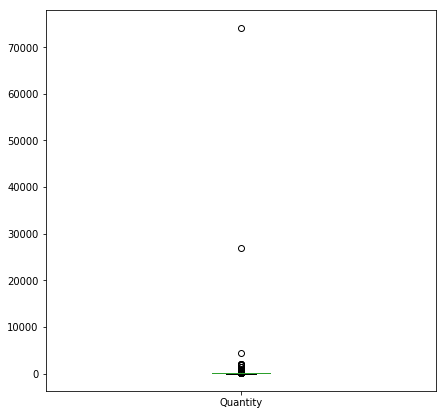

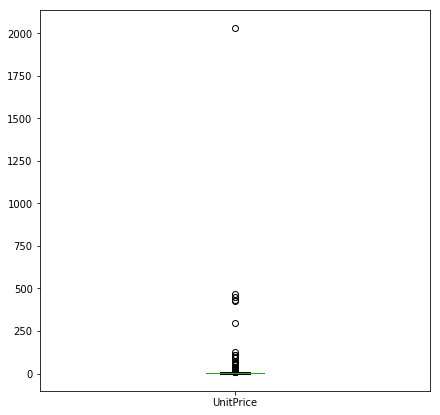

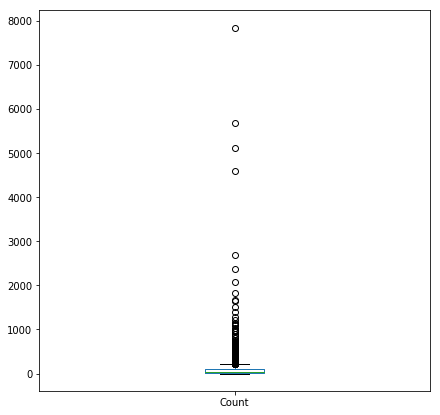

In [11]:
plt.figure(figsize=(7,7))
data1['Quantity'].plot(kind='box')
plt.show()
plt.figure(figsize=(7,7))
data1['UnitPrice'].plot(kind='box')
plt.show()
plt.figure(figsize=(7,7))
data1.Count.plot(kind='box')
plt.show()

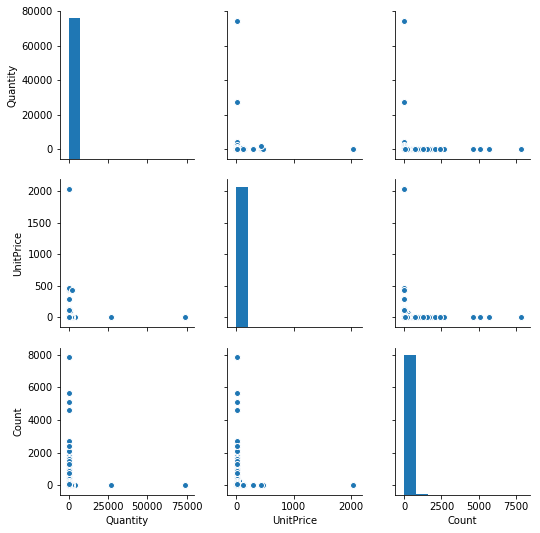

In [12]:
sns.pairplot(data1)
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

normaliz = StandardScaler()
data1N = normaliz.fit_transform(data1)

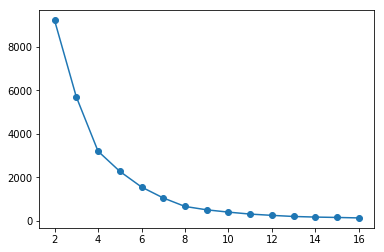

In [14]:
from sklearn.cluster import KMeans

k = np.arange(2, 17)
inertias = []
for kn in k:
    mod = KMeans(n_clusters=kn)
    label = mod.fit_transform(data1N)
    inertias.append(mod.inertia_)
    
plt.plot(k, inertias, '-o')
plt.show()

In model selection KMeans, we have to consider between the error and number of cluster. we will choose cluster who didn't significance in decreasing when we add more cluster, and I think that is 5 cluster.

In [15]:
#Select Model KMeans with 5 Cluster

model = KMeans(n_clusters = 5, random_state=21)
label = model.fit_predict(data1N)

print(label)

[1 0 0 ... 0 4 0]


In [16]:
print(pd.Series(label).value_counts())

data1['Cluster'] = label

0    4070
4     262
3       4
2       1
1       1
dtype: int64


We have minority here, that should be outlier, we don't need cluster that have only 1 Customer. so we will remove that customer.

actually, KMeans is not good if our data have outlier.

In [17]:
from scipy.stats import zscore

#Remove outlier
indexO = []
indexO = indexO + list(data1[zscore(data1['Count'])>3].index.astype(int))
indexO = indexO + list(data1[zscore(data1['Count'])<-3].index.astype(int))
indexO = indexO + list(data1[data1['Count']<10].index.astype(int))

In [18]:
data1.index = data1.index.astype(int)
data1_ = data1.drop(index=indexO)
data1_.describe()

,Quantity,UnitPrice,Count,Cluster
count,3727.000000,3727.000000,3727.000000,3727.000000
mean,14.099188,3.266702,90.979340,0.254360
std,40.150529,2.605585,107.828801,0.976216
min,1.000000,0.391724,10.000000,0.000000
25%,5.746795,2.234777,25.000000,0.000000
50%,9.631579,2.903846,51.000000,0.000000
75%,13.512007,3.746495,111.000000,0.000000
max,1802.800000,98.528947,756.000000,4.000000


In [19]:
data1_N = normaliz.fit_transform(data1_[['Quantity','UnitPrice','Count']])
label1=model.fit_predict(data1_N)
print(pd.Series(label1).value_counts())

1    3274
4     434
0      16
3       2
2       1
dtype: int64


we still have cluster that have 1 customer, I think we can't denied it, we have to treat them different, I think these are fraud customer.

let we see now the characteristic every cluster

In [20]:
data1_=data1_.drop(['Cluster'],axis=1)

In [21]:
data1_['Label'] = label1
print("Cluster 0")
print(data1_[data1_['Label']==0])
print("========================================================================================")
print("Cluster 1")
print(data1_[data1_['Label']==1])
print("========================================================================================")
print("Cluster 2")
print(data1_[data1_['Label']==2])
print("========================================================================================")
print("Cluster 3")
print(data1_[data1_['Label']==3])
print("========================================================================================")
print("Cluster 4")
print(data1_[data1_['Label']==4])

Cluster 0
              Quantity  UnitPrice  Count  Label
CustomerID                                     
12830       259.157895   1.086316     38      0
12901       198.922414   1.466379    116      0
12931       341.512195   1.701707     82      0
13027       664.615385   0.400000     26      0
14101       198.342857   1.730000     35      0
15769       228.246154   2.050769    130      0
16029       166.148760  36.042934    242      0
16333       715.200000   1.066222     45      0
16684       181.425993   2.451625    277      0
17306       174.106061   1.558030     66      0
17381       235.311927   1.335321    109      0
17404       165.393939   2.193939    198      0
17450       207.694362   3.392641    337      0
17857       356.592593  10.332407     54      0
17949       436.371429   3.391429     70      0
18251       489.000000   0.771875     16      0
Cluster 1
             Quantity  UnitPrice  Count  Label
CustomerID                                    
12347       13.505495 

In [22]:
from sklearn.manifold import TSNE

mod = TSNE(learning_rate=50)



In [23]:
samples = data1_[['Quantity', 'UnitPrice', 'Count']].values

In [24]:
tsne_feature = mod.fit_transform(samples)

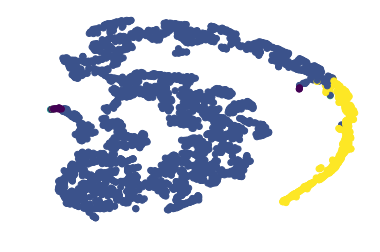

In [27]:
plt.scatter(tsne_feature[:,0], tsne_feature[:,1], c=label1)
plt.axis('off')
plt.show()

In [28]:
data2 = dfdrop.groupby('Country')['Quantity','UnitPrice'].mean()
data2['Count'] = dfdrop.groupby('Country').count().UnitPrice
print(data2.info())
print("=================================================================")
print(data2.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, Australia to Unspecified
Data columns (total 3 columns):
Quantity     38 non-null float64
UnitPrice    38 non-null float64
Count        38 non-null int64
dtypes: float64(2), int64(1)
memory usage: 1.2+ KB
None
        Quantity  UnitPrice          Count
count  38.000000  38.000000      38.000000
mean   20.565899   5.947682   13950.078947
std    20.946950   9.338847   78532.279915
min     6.157895   2.047383       9.000000
25%    10.761310   3.203275     120.250000
50%    13.419989   4.214697     355.000000
75%    18.237049   4.858326    1154.250000
max    84.934718  58.333288  485122.000000


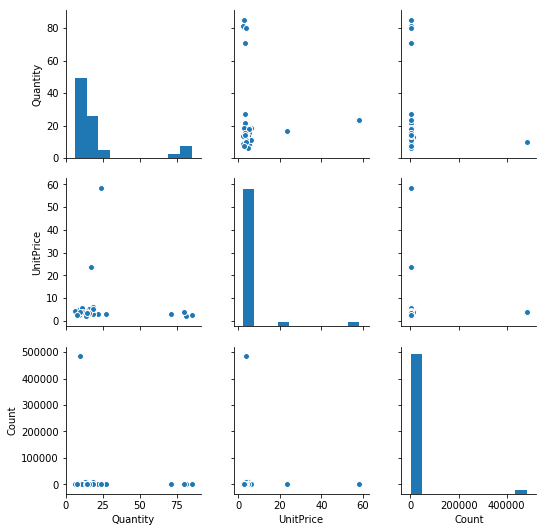

In [29]:
sns.pairplot(data2)
plt.show()

In [30]:
k = np.arange(2, 11)
inertias = []
data2N = normaliz.fit_transform(data2)
for kn in k:
    mod = KMeans(n_clusters=kn)
    label = mod.fit_predict(data2N)
    inertias.append(mod.inertia_)

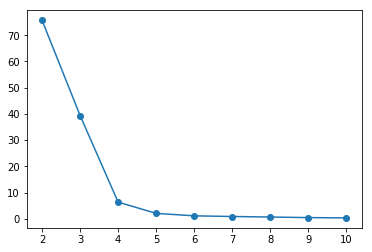

In [31]:
plt.plot(k, inertias, '-o')
plt.show()

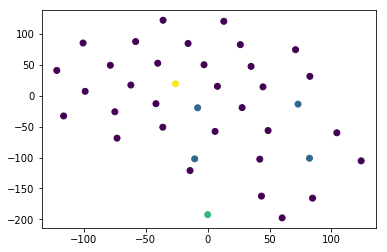

In [32]:
mod2 = TSNE(learning_rate=100)

country_mod = KMeans(n_clusters=4)
country_label = country_mod.fit_predict(data2N)

tsne_country = mod2.fit_transform(data2.values)

plt.scatter(tsne_country[:,0], tsne_country[:,1], c=country_label)
plt.show()

In [33]:
print(pd.Series(country_label).value_counts())

0    32
1     4
3     1
2     1
dtype: int64


I think I fail to find pattern for clustering, so I willl start again.... doing different feature engeenering and more cleaning, but still use dfdrop (which is no cancel transaction)

In this new analysis, I will segment market based on what they need (they buy) and their purchasing power. so the feature I will use in the analysis are :
1. StockCode, but I will group the product with the similar code. and I don't want unique product that appear only 1, better to combine it with similar product, to make easy clustering.
2. I will use feature multiplication between UnitPrice and Quantity, which is that's mean purchasing power of Customer.
3. I will use feature about how many time they bought (frequenty buying)

In [34]:
dfdrop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530103 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      530103 non-null object
StockCode      530103 non-null object
Description    530103 non-null object
Quantity       530103 non-null int64
InvoiceDate    530103 non-null datetime64[ns]
UnitPrice      530103 non-null float64
CustomerID     397884 non-null float64
Country        530103 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB


In [35]:
data3 = dfdrop.reset_index().drop(['index'], axis=1)

def slicing(value) :
    if type(value) == np.int :
        return str(value)[:3]
    return value
              

In [36]:
print(data3.StockCode.apply(slicing).value_counts().nunique())
data3['StockCode'] = data3.StockCode.apply(slicing)

262


In [37]:
data3['PowerPurchas'] = data3['UnitPrice'] * data3['Quantity']

In [38]:
product = pd.get_dummies(data3['StockCode'])

In [39]:
country = pd.get_dummies(data3['Country'])

In [40]:
data3 = data3.drop(['InvoiceNo', 'StockCode', 'InvoiceDate', 'Country', 'Description'], axis=1)

In [41]:
data3 = pd.concat([data3, country, product], axis=1)

In [ ]:
data3 = data3.groupby('CustomerID').sum()

In [ ]:
data3.to_csv('data3.csv')